**ISYE 6740 - Machine Learning**

Homework 1 - 1/19/2020

Graham Billey

**Clustering [60 points]**



**[a-b]** Given $N$ data points $\text x^n (n=1,\dots,N)$, $K$-means clustering algorithm groups them into $K$ clusters by minimizing the distortion function over $\{ r^{nk}, \mu^k \}$
$$J=\sum_{n=1}^N\sum_{k=1}^Kr^{nk} \|\text x^n-\mu^k\|^2,$$
where $r^{nk}=1$ if $\text x^n$ belongs to the $k$-th cluster and $r^{nk}=0$ otherwise.

**(a) [20 points]** Prove that using the squared Euclidean distance $\|\text x^n-\mu^k\|^2$ as the dissimilarity function and minimizing the distortion function, we will have 

   $$\mu^k=\frac{\sum_n r^{nk} \text x^n}{\sum_n r^{nk}}.$$

That is, $\mu^k$ is the center of $k$-th cluster.

-----------------

The k-means algorithm attempts to minimize $J$. To prove $\mu^k$ is the center of the $k$-th cluster, we need to calculate the value of $\mu^k$ at the minimum $J$. To prove it is a minimum, we need to show the second derivative of $J$ evaluated at $\mu^k$ is $\geq 0$  

For fixed $r^{nk}$, we will minimize $J$ w.r.t. a specific cluster center $\mu^k$ 

$$\nabla_{\mu^k} J = \nabla_{\mu^k} \sum_{n=1}^N\sum_{k=1}^K r^{nk} \| x^n-\mu^k\|^2$$

$$ = \sum_{n=1}^N\sum_{k=1}^K r^{nk} \nabla_{\mu^k} (x^n - \mu^k)^T (x^n - \mu^k)$$

Since all $r^{nk}$ not in cluster $k$ is 0...

$$ = \sum_{n=1}^N r^{nk} \nabla_{\mu^k} (x^n - \mu^k)^T (x^n - \mu^k) $$

Since ${x^n}^T \mu^k $ and $ {\mu^k}^T x^n $ are both scalars and equal...

$$ = \sum_{n=1}^N r^{nk} \nabla_{\mu^k} ({x^n}^T x^n - 2{x^n}^T \mu^k + {\mu^k}^T \mu^k) $$

Since $ {x^n}^T x^n $ does not depend on $ \mu^k $, $ \nabla_{\mu^k} {x^n}^T x^n = 0  $

$$ = \sum_{n=1}^N r^{nk} (-2 \nabla {x^n}^T \mu^k + \nabla {\mu^k}^T \mu^k) $$

$$ = \sum_{n=1}^N r^{nk} (-2 x^n + 2 \mu^k) $$

Find the minimum by setting equal to 0...

$$ \sum_{n=1}^N r^{nk} (-2 x^n + 2 \mu^k) = 0 $$

$$ -\sum_{n=1}^N r^{nk} x^n + \sum_{n=1}^N r^{nk} \mu^k = 0 $$

$$ \mu^k = \frac{\sum_{n=1}^N r^{nk} x^n}{\sum_{n=1}^N r^{nk}}$$

To prove this is a minimum...

$$ \frac{\partial}{\partial \mu^k} \sum_{n=1}^N r^{nk} (-2 x^n + 2 \mu^k) $$

$$ = 2 \sum_{n=1}^N r^{nk} \geq 0 $$

Therefore, $\mu^k$ is a minimum.

**(b) [20 points]** Prove that $K$-means algorithm converges to a local optimum in finite steps.

We showed above that the k-means algorithm converges to a local optimum. This answer will focus on the "finite steps" part of the question.

The cost function is... 

$$ J=\sum_{n=1}^N\sum_{k=1}^Kr^{nk} \|\text x^n-\mu^k\|^2 $$

My first argument is that since N and K are finite, the **state space of the solutions is finite**.

Therefore, there are a maximum of **$N^K$ possible assignments of points to clusters**.

At each step, we get a solution that is lower cost than the previous solution. Therefore the assignment only goes in one direction, and we **can not revisit old states**.

Becasue you can not revisit old states, and assignment only happens if the new solution is strictly lower in cost than the current state, **you can not oscillate**.

Lastly, if N = K and each point is it's own cluster center, you have the smallest possible cost function, $J = 0$.

Therefore, since the state space is finite and you can not revisit old solutions (meaning the solutions can not oscillate), the k-means algorithm must converge in finite steps.


**(c) [20 points]** For the following data (two moons), which of these three distance metrics below (if any) would successfully separate the two moons? Explain the reasoning.


**Single Linkage is the only distance metric that would reliably separate the two moons.** 

This can be understood by thinking through agglomerative hierarchial clustering, where each point starts as it's own cluster, and pairs of clusters are merged as you move up the hierarchy.

For a few iterations, all three clustering methods would likely give similar results. However, once the clusters get big enough, the sections of the two moons that are closest may start to interfere.

The regions I'm referring to are circled in the image below.

<img src="moons1.png">


**With single linkage, there will always a point in the "correct" moon that will be closer than the closest point in the "incorrect" moon.**

Also, with complete linkage, if the clusters were separated as shown below, then it is possible that the smallest maximum distance could be between clusters in "incorrect" moons, as indicated by the blue arrow in the image below. That can also happen with Average linkage, although I did not draw it explicitly.

<img src="moons2.png">

-------------
**Image compression using clustering [40 points]**

In this programming assignment, you are going to apply clustering algorithms for image compression. Your task is implementing the clustering parts with two algorithms: $K$-means and $K$-medoids. It is required you implementing the algorithms yourself rather than calling from a package.

**Inputs**

- `pixels`: The input image representation. Each row contains one data point (pixel). There are three columns, each one corresponding to the R, G, B color components. Each component has an integer value between 0 and 255.

- `K`: The number of desired clusters.

**Outputs**

- `class`: The cluster assignment of each data point in `pixels`. The assignment should be `1, 1, 3... etc.` The output should be a column vector with `size(pixels, 1)` elements.

- `centroid`: The locations of the `K` centriods in the result. With images, each centroid corresponds to the representative color from each cluster. The output should be a matrix with `K` rows and `3` columns. The range of values should be `[0, 255]`, possibly floating point numbers.

**Approach**

1. Read in the data and manipulate images to desired format.

2. Initialize the medioids.

3. Calculate distances from each point to the medioid of each cluster.

4. Assign each data point to a cluster based on the distances calculated in step 3.

5. Update the medioids based on the fixed cluster assignments.

6. Check for convergence. If not converged, go back to step 3 and repeat.

In [258]:
import time
import numpy as np
from PIL import Image

# These helper functions will allow us to perform each step of the k-medioids algorithm.
# I will define all functions first, then put them all together into a single implementation. 

# Step 1. Read in the data and manipulate images to the desired format.
def image_to_array(image):
    width = image.size[0]
    height = image.size[1]
    return (width, height, np.array(image, dtype='int16').reshape(width*height, 3))

def array_to_image(width, height, image_array):
    assert isinstance(width, int)
    assert isinstance(height, int)
    image_array = image_array.astype(np.uint8)
    return Image.fromarray(image_array.reshape(height, width, 3))

##################################################################
# Read the image and convert to array
# im = Image.open('beach.bmp')
# width, height, im_array = image_to_array(im)
# display(im)
##################################################################

# Step 2. initialize the medioids.
def initialize_medioids(image_array, K, rand_seed=1):
    np.random.seed(rand_seed)
    medioids = np.random.choice(len(image_array), replace=False, size=K)
    return image_array[medioids, :]

##################################################################
# medioids = initialize_medioids(im_array, 5)
##################################################################


# Step 3. Calculate distances from each point to the medioid of each cluster
def calculate_distances_to_medioids(image_array, medioids, l_norm=2):
    num_points = len(image_array)
    K = len(medioids)
    dists = np.zeros((num_points, K))
    
    for i in range(num_points):
        dist = np.linalg.norm(image_array[i,:] - medioids, axis=1, ord=l_norm)
        dists[i,:] = dist**l_norm
    
    return dists

##################################################################
# distances = calculate_distances_to_medioids(im_array, medioids)
##################################################################

# Step 4. Assign each data point to a cluster based on the distances calculated in step 3.
def assign_each_point_to_closest_medioid(dists):
    return np.argmin(dists, axis=1)
    
    
# Step 5. Update the medioids based on the fixed cluster assignments.
def update_medioids(image_array, medioids, l_norm=2):
    centers = np.zeros(medioids.shape)
    new_medioids = np.zeros(medioids.shape)
    distances = calculate_distances_to_medioids(image_array, medioids, l_norm)
    labels = assign_each_point_to_closest_medioid(distances)
    
    for cluster in set(labels):

        points_in_cluster = np.array([image_array[j] for j in range(len(image_array)) if labels[j] == cluster])
        centers[cluster] = np.mean(points_in_cluster, axis=0)
    
        # Calculate distance from each point in cluster to the cluster center.
        num_points = len(points_in_cluster)
        temp_distances = np.zeros(num_points)
    
        for i in range(num_points):
            dist = np.linalg.norm(points_in_cluster[i,:] - centers[cluster], ord=l_norm)
            temp_distances[i] = dist**l_norm
        
        # Assign the point that is closest to the center to be the new medioid.
        new_medioids[cluster] = points_in_cluster[np.argmin(temp_distances)]

    return new_medioids

##################################################################
# new_medioids = update_medioids(im_array, medioids, l_norm=2)
##################################################################


# Step 6. 
def check_for_convergence(medioids, new_medioids):
    return np.array_equal(medioids, new_medioids)

# Putting it all together.
def k_medioids(pixels, K, max_iterations = 10, l_norm = 2):
    print('Running k_medioids...')
    t0 = time.time()
    image_array = pixels  # To fit the naming convention outlined in the assignment...
    converged = False
    medioids = initialize_medioids(pixels, K)
    iteration = 1
    
    while (not converged) and (iteration < max_iterations):
#         print('Iteration: ', iteration)

        distances = calculate_distances_to_medioids(image_array, medioids, l_norm)
        labels = assign_each_point_to_closest_medioid(distances)
        new_medioids = update_medioids(pixels, medioids)
        
        converged = check_for_convergence(medioids, new_medioids)
        medioids = new_medioids
        iteration += 1

        
    class_ = labels        # To fit the naming convention outlined in the assignment...
    centroids = medioids  # To fit the naming convention outlined in the assignment...
    t1 = time.time()
    runtime = round(t1-t0)
    
    return class_, centroids, iteration, runtime
        
        

**Hand-In Questions**

**1. Explain how you designed and implemented details of your $K$-medioids algorithm, including:**

       a. How you chose representatives from each cluster.
       
       b. What distance measured you tried and chose to use.
       
       c. When you stopped iteration.

To implement my $K$-medioids algorithm, I first broke the task into 6 different parts, and wrote functions to implement each part. Then I put it all together. I also wrote functions to manipulate the images into the format used by the $K$-medioids functions, and to turn them back into PIL images for display.

My $K$-medioids package chooses K medioids from the dataset at random using the np.random.choice method. 

My $K$-medioids package uses a generalized Minkowski distance framework, with the $L = 2$ norm by default, which is Euclidean distance. Using a lower $L$ value caused the program to run faster, in general.

Using a larger $K$-value did not in general cause the program to take longer to run.

My $K$-medioids package stops iterating when either the medioids are no longer changing, or the maximum number of user-supplied iterations is reached. This was done to prevent excessive runtimes, which seemed to happen with large numbers of iterations.

**2. Attach a picture of your own.**

You in the image below, you can see my $K$-medioids algorithm running with the picture `zebra.bmp` which I supplied.

**3. Run your $K$-medioids implementation with several different $K$. What did you observe? How long does it take to converge?**

As one would expect, using a larger $K$ value gives us a picture that looks more similar to the original image, as the number of colors in the final image = $K$. Using a small $K$ value (less than 5) gives a very abstract-looking image, regardless of the number of iterations. Using a larger $K$ value (50 for instance) gives an image that barely looks any different. In general, it didn't appear that with larger K-values the program too more steps to converge.

**4. Run your $K$-medioids implementation with different centroids. Does it affect the final result?**

With large $K$ and random assignment of the initial centroids, the final results look almost indistinguishable between runs. 

With small $K$ and random assignment of initial centroids, the final result can look very different.

With non-random assignment of initial centroids, it is possible to get final results that look very different regardless of $K$, because you can pick centroids that have identical (or very similar) RGB values.

**5. Repeat questions 2 and 3 with $K$-means. Do you see a significant difference between $K$-medioids and $K$-means in terms of output quality, robustness, or running time?**

There was no discernable difference in terms of robustness or output quality, although the runtime was dramatically lower with $K$-means.

In general, the algorithm tends to remove bright colors and dull everything down. The colors that appear less in the images, like bright reds, oranges, and blues, were mostly removed.

<img src="Runtime_data.png">

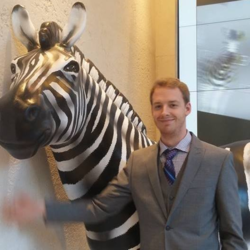

Running k_medioids...
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iterations:  19 Runtime in seconds:  40


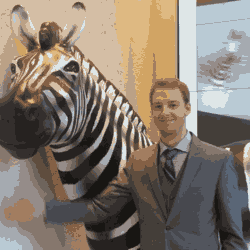

In [257]:
# Test the functions!

# Read the image and convert to array
original_image = Image.open('zebra.bmp').convert('RGB')
display(original_image)
width, height, pixels = image_to_array(original_image)

# Compress the image with k-medioids
final_labels, medioids, iterations, runtime = k_medioids(pixels, K=20, max_iterations=200, l_norm=2)
print('Iterations: ', iterations, 'Runtime in seconds: ', runtime)

# Convert the compressed result back into an image
new_image = np.zeros(pixels.shape)
for i in range(len(final_labels)):
    new_image[i] = medioids[final_labels[i]]

compressed_image = array_to_image(width, height, new_image)
display(compressed_image)

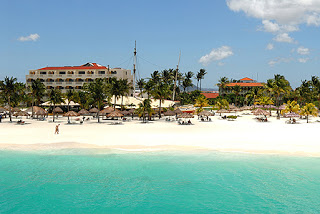

Running k_medioids...
Iterations:  26 Runtime in seconds:  60


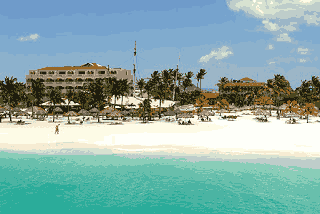

In [259]:
# Test the functions!

# Read the image and convert to array
original_image = Image.open('beach.bmp').convert('RGB')
display(original_image)
width, height, pixels = image_to_array(original_image)

# Compress the image with k-medioids
final_labels, medioids, iterations, runtime = k_medioids(pixels, K=20, max_iterations=200, l_norm=2)
print('Iterations: ', iterations, 'Runtime in seconds: ', runtime)

# Convert the compressed result back into an image
new_image = np.zeros(pixels.shape)
for i in range(len(final_labels)):
    new_image[i] = medioids[final_labels[i]]

compressed_image = array_to_image(width, height, new_image)
display(compressed_image)

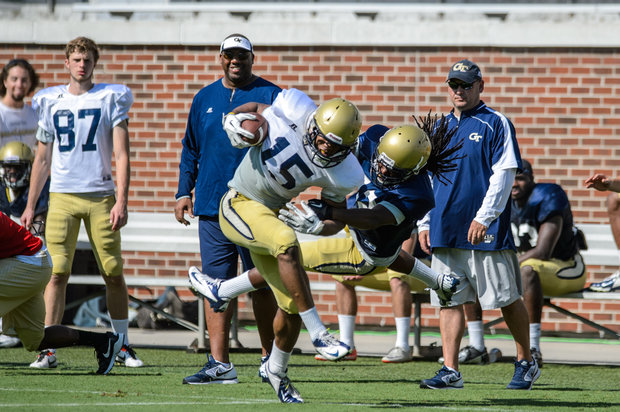

Running k_medioids...
Iterations:  10 Runtime in seconds:  72


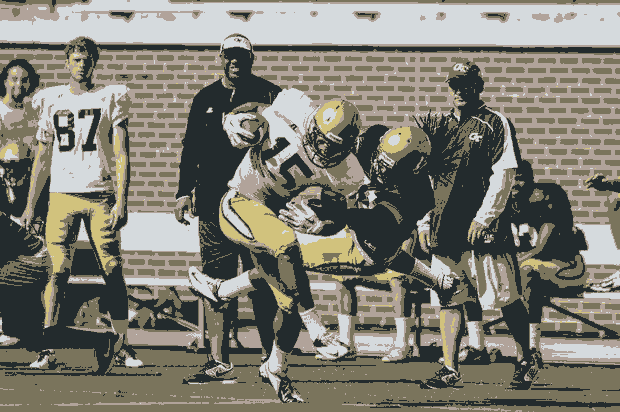

In [261]:
# Test the functions!

# Read the image and convert to array
original_image = Image.open('football.bmp').convert('RGB')
display(original_image)
width, height, pixels = image_to_array(original_image)

# Compress the image with k-medioids
final_labels, medioids, iterations, runtime = k_medioids(pixels, K=5, max_iterations=200, l_norm=2)
print('Iterations: ', iterations, 'Runtime in seconds: ', runtime)

# Convert the compressed result back into an image
new_image = np.zeros(pixels.shape)
for i in range(len(final_labels)):
    new_image[i] = medioids[final_labels[i]]

compressed_image = array_to_image(width, height, new_image)
display(compressed_image)

**Thank you for grading my homework! :)**